In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from cocodata import COCOInstancesDataset
from torchvision.transforms.functional import to_pil_image, to_tensor
from PIL import Image

/USERSPACE/lukovdg1/venvs/sd3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
cocodataset = COCOInstancesDataset(maindir="/USERSPACE/lukovdg1/coco2017", split="v", upscale_to=512)

loading captions
loading instances
Creating examples


100%|██████████| 5000/5000 [00:00<00:00, 308713.42it/s]

Size stats:
{384: 1937, 448: 1792, 512: 343}
Retained examples: 3342
Too many regions: 121
Too few regions: 609
Too small: 928


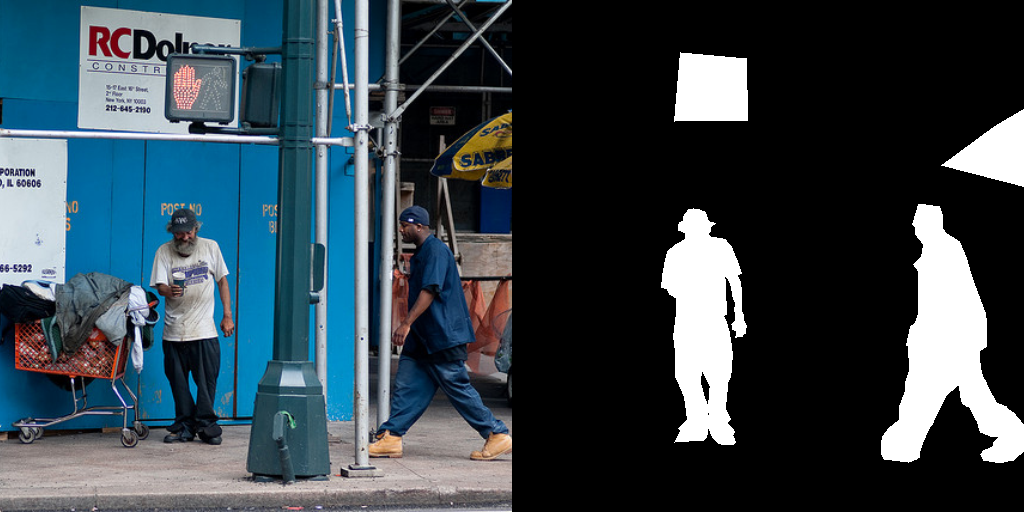

a bearded man in a white t-shirt and black pants.


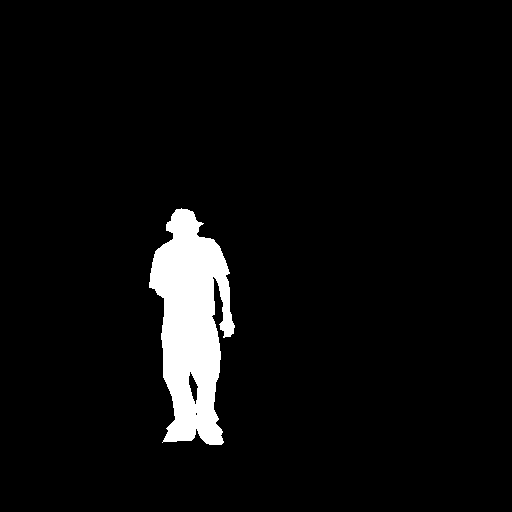

man wearing blue cap, blue shirt, blue pants, and brown shoes.


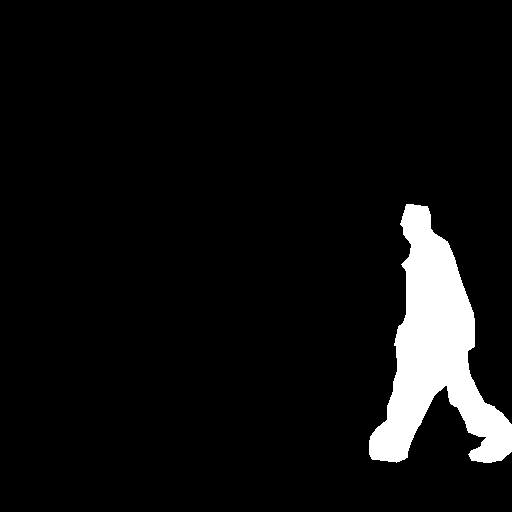

yellow and blue umbrella.


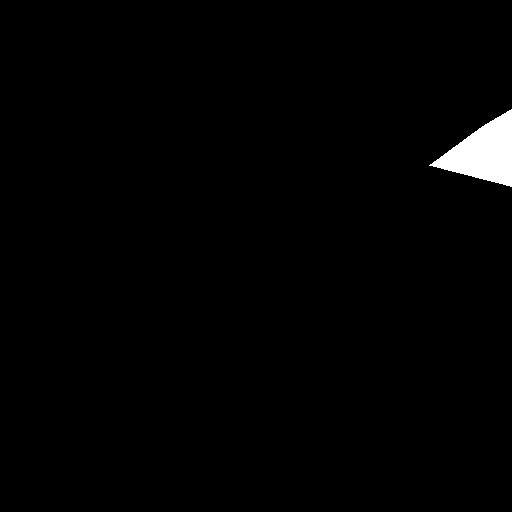

the traffic light is red.


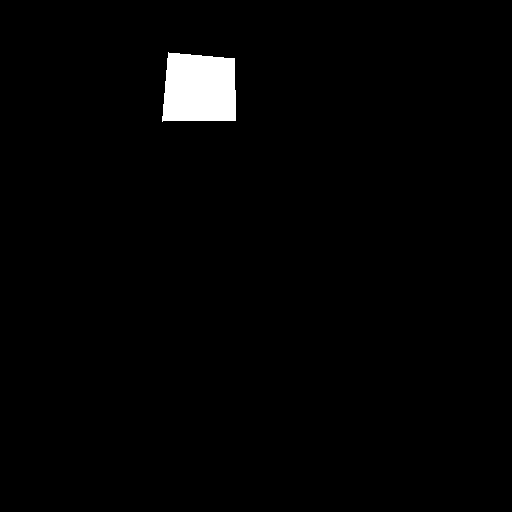

In [4]:
def display_example(example):
    image = to_pil_image(example["image"] * 0.5+0.5)
    maskimg = example["cond_image"].sum(0)
    maskimg = maskimg / maskimg.max()
    maskimg = to_pil_image(maskimg)
    newsize_w = image.size[0] + maskimg.size[0]
    newsize_h = max(image.size[1], maskimg.size[1])
    firstimage = Image.new("RGB", (newsize_w, newsize_h), "white")
    firstimage.paste(image, (0, 0))
    firstimage.paste(maskimg, (image.size[0], 0))
    display(firstimage)
    
    for mask, caption in zip(example["cond_image"].unbind(0), example["seg_captions"]):
        if caption is None:
            assert mask.sum() == 0
            continue
        if mask.sum() == 0:
            print(caption, ": not present in crop")
        else:
            print(caption)
            display(to_pil_image(mask.float()))
    
display_example(cocodataset[1])

In [6]:
torch.nn.attention.flex

AttributeError: module 'torch.nn.attention' has no attribute 'flex'

In [7]:
x = torch.randn(4, 5, 6)

In [9]:
x.sum(0, keepdim=True).shape

torch.Size([1, 5, 6])